# Análisis sobre el impacto del bitcoin en la macroeconomía de El Salvador

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kstest

## 1. Obtención de datos

En esta sección veremos los datos que utilizaremos para el análisis:

- Deuda pública de El Salvador
- Índice de precios al consumidor (IPC)
- Producto interno bruto (PIB) de El Salvador
- Inversión extranjera
- Precio histórico del bitcoin

Para lo cual solo extraeremos el dataframe y **ordenaremos**, **limpiaremos** y **filtraremos** los datos para las fechas del 2019 al 2022

### 1.1 Deuda pública de El Salvador

In [88]:
ruta = "Datos_bitcoin/Deuda_SV/Deuda_Externa_Pública_Total.csv"
df = pd.read_csv(ruta, encoding='utf-8', sep=",",skiprows=4, skipfooter=2,engine="python") 
df = df.iloc[:7]
df[" "]=[
    'Total Deuda Externa Pública',
    'Total Sectores Público No Financiero',
    'Gobierno Central','Resto Del Gobierno Central',
    'Empresas Públicas No Financieras',
    'Total Sectores Públicos Financiero',
    'Banco Central De Reserva' ]
df.columns = ['Años', '2019', '2020', '2021', '2022']
df_DPE_concepto = df.set_index('Años').T
df_DPE_concepto["Gobierno Central"] = df_DPE_concepto["Gobierno Central"].values + df_DPE_concepto["Resto Del Gobierno Central"].values
df_DPE_concepto.drop(columns="Resto Del Gobierno Central", axis=1,inplace=True)
df_DPE_concepto.index = pd.date_range("2019-01-01", periods=4, freq="YE")
df_DPE_concepto


Años,Total Deuda Externa Pública,Total Sectores Público No Financiero,Gobierno Central,Empresas Públicas No Financieras,Total Sectores Públicos Financiero,Banco Central De Reserva
2019-12-31,9981.44,9636.70,9094.60,542.09,234.45,110.29
2020-12-31,11152.88,10745.16,10209.14,536.01,240.07,167.65
2021-12-31,11921.86,11454.13,10964.84,489.29,325.92,141.81
2022-12-31,11618.73,11123.60,10642.81,480.79,409.17,85.97


In [89]:
df_DPE = df_DPE_concepto["Total Deuda Externa Pública"]
df_DPE= df_DPE.reset_index()
df_DPE.columns =["Años","Total Deuda Externa Pública"]
df_DPE.set_index("Años", inplace=True)
df_DPE.index = pd.date_range("2019-01-01", "2022-12-31", freq="YE")
df_DPE

,Total Deuda Externa Pública
2019-12-31,9981.44
2020-12-31,11152.88
2021-12-31,11921.86
2022-12-31,11618.73


#### 1.1.1 Diagrama lineal

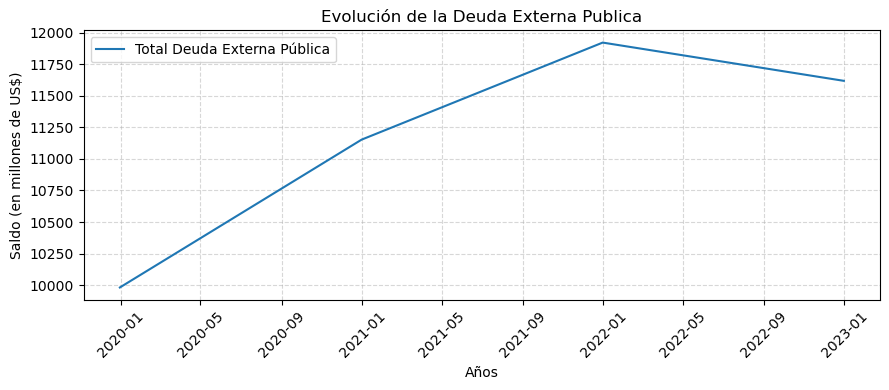

In [90]:
plt.figure(figsize=(9, 4))
for column in df_DPE.columns:
    plt.plot(df_DPE.index, df_DPE[column], label=column)

plt.title("Evolución de la Deuda Externa Publica")
plt.xlabel("Años")
plt.ylabel("Saldo (en millones de US$)")
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

El 7 de septiembre de 2021, El Salvador adoptó el Bitcoin como moneda legal. Antes de esto, la deuda externa pública del país venía subiendo. Pasó de 9,981.44 millones en 2019 a 11,152.88 millones en 2020, y alcanzó su nivel más alto en 2021 con 11,921.86 millones. Sin embargo, en 2022, la deuda bajó un poco, llegando a 11,618.73 millones

### 1.2 Índice de precios al consumidor (IPC)

In [128]:
ipc_file_path = "Datos_bitcoin/IPC_SV/Índice_de_Precios_al_Consumidor_(IPC).csv"

df_ipc = pd.read_csv(ipc_file_path, encoding='ISO-8859-1', sep=",", skiprows=4)
df_ipc = df_ipc.iloc[:-2]

data = {}
fechas = pd.date_range(start="2019-01-01", end="2022-12-31", freq="ME")
columnas = [
    "Índice general", 
    "Alimentos y bebidas no alcohólicas", 
    "Bebidas alcohólicas, tabaco", 
    "Prendas de vestir y calzado",
    "Alojamiento, agua, electricidad, gas y otros combustibles"    ,
    "Muebles, artículos para el hogar y para la conservación ordinaria del hogar",
    "Salud",
    "Transporte",
    "Comunicaciones",
    "Recreación y cultura",
    "Educación",
    "Restaurantes y hoteles",
    "Bienes y servicios diversos"
]

for i in range(0, len(df_ipc)):
    data[i] = df_ipc.iloc[i, 1:-1].values

df_ipc = pd.DataFrame(data)
df_ipc.columns = columnas
df_ipc.index = fechas
df_ipc.index.name = "Fecha"
df_ipc = df_ipc.astype(float)
df_ipc.head()

,Índice general,Alimentos y bebidas no alcohólicas,"Bebidas alcohólicas, tabaco",Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Comunicaciones,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
Fecha,,,,,,,,,,,,,
2019-01-31,112.24,120.81,147.30,92.76,137.52,100.29,99.29,106.83,84.64,87.77,113.27,123.41,107.39
2019-02-28,112.44,121.12,146.86,92.93,137.35,100.52,99.27,107.41,84.32,88.71,113.27,123.37,107.40
2019-03-31,112.69,121.39,146.84,92.89,137.51,100.16,99.27,108.94,84.32,88.48,113.27,123.54,107.55
2019-04-30,112.87,121.71,147.11,92.90,136.16,100.25,99.34,111.01,84.32,88.72,113.27,123.49,107.36
2019-05-31,113.01,122.29,147.74,92.69,135.75,100.30,99.44,111.41,84.31,88.75,113.27,123.57,107.13


#### 1.2.1 Diagrama lineal

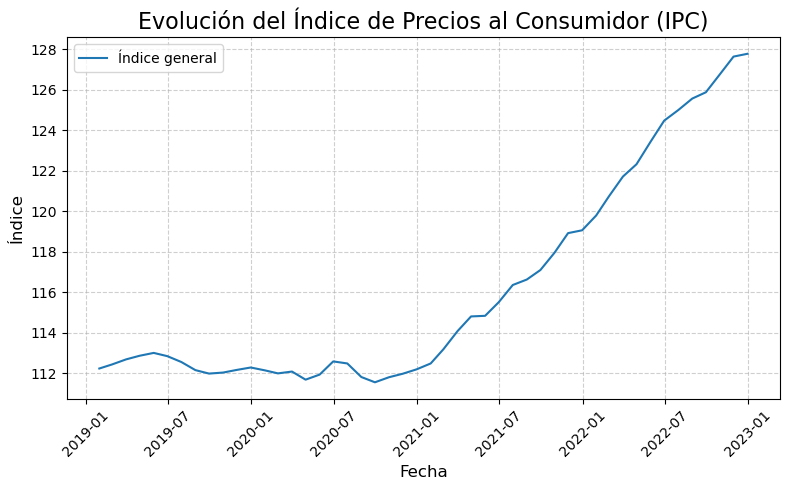

In [131]:
plt.figure(figsize=(8, 5))

plt.plot(df_ipc.index, df_ipc["Índice general"], label="Índice general")
plt.title("Evolución del Índice de Precios al Consumidor (IPC)", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Índice", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### 1.3 Producto interno bruto (PIB) de El Salvador

In [93]:
import pandas as pd

file_path = "Datos_bitcoin/PIB_SV/Producto_Interno_Bruto__Producción_Gasto_e_Ingreso_A_precios_corrientes.csv"

df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=',', skiprows=4)
pib = pd.Series(df.columns[1:])

df_pib = pd.DataFrame(pib, columns=["PIB en millones"])
df_pib.index = [2019, 2020, 2021, 2022, 2023]
df_pib.index.name = "Año"
df_pib["PIB en millones"] = df_pib["PIB en millones"].astype(float)

df_pib_filtered = df_pib.loc[2019:2022]
df_pib_filtered.index = pd.date_range("2019-01-01", periods=4, freq="YE")
df_pib_filtered


,PIB en millones
2019-12-31,26881.14
2020-12-31,24921.19
2021-12-31,29043.14
2022-12-31,31988.92


#### 1.3.1 Diagrama lineal

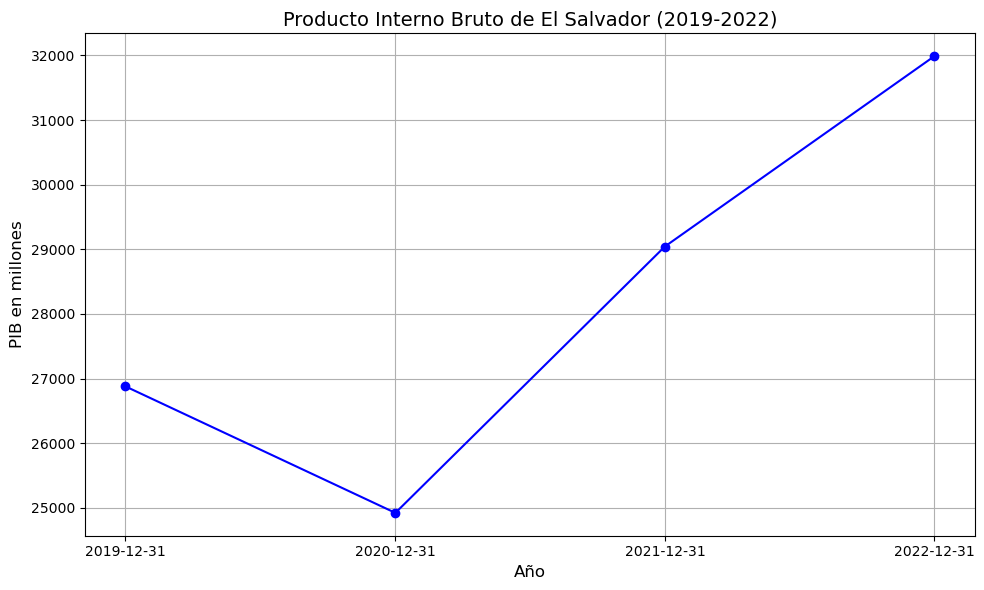

In [94]:
# Código para mostrar el diagrama lineal
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_pib_filtered.index, df_pib_filtered["PIB en millones"], marker='o', linestyle='-', color='b')
plt.title("Producto Interno Bruto de El Salvador (2019-2022)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("PIB en millones", fontsize=12)
plt.grid(True)
plt.xticks(df_pib_filtered.index, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


### 1.4 Inversion extranjera

In [95]:
# Código para mostrar el dataframe de inversión extranjera
import pandas as pd

path_relative = "Datos_bitcoin/Inversion_SV/Posición_de_Inversión_Internacional_a_fin_de_período.csv"

df = pd.read_csv(path_relative, encoding='ISO-8859-1', skiprows=2, header=None)

headers = df.iloc[1, 1:].values  # Fechas
concepts = df.iloc[2:, 0]  # Conceptos (e.g., Posición Neta, Activos)

concepts = concepts.str.replace('Ã³', 'ó').str.replace('Ã±', 'ñ').str.replace('Ã®', 'í')

notes_keywords = ["Notas", "Con el fin de mejorar", "eurobonos emitidos"]
rows_to_keep = ~concepts.str.contains('|'.join(notes_keywords), na=False)

filtered_concepts = concepts[rows_to_keep].reset_index(drop=True)
filtered_data = df.iloc[2:, 1:].loc[rows_to_keep].reset_index(drop=True)

df_data = pd.DataFrame(data=filtered_data.values, index=filtered_concepts, columns=headers)

filtered_columns = [col for col in df_data.columns if str(col).startswith(("2019", "2020", "2021", "2022"))]
df_filtered = df_data[filtered_columns].copy()

df_filtered = df_filtered.apply(pd.to_numeric, errors='coerce')

df_transformed = df_filtered.T
df_transformed.index.name = 'Fecha'
df_transformed.columns.name = 'Concepto'

df_transformed = df_transformed.dropna(how='all')

df_transformed.index = pd.date_range(start="2019-03-01", freq="QE", periods=16)
df_transformed.head()



Concepto,Posición de Inversión Internacional Neta,Activos,Pasivos
2019-03-31,-16948.47,9945.76,26894.23
2019-06-30,-17321.75,10176.15,27497.90
2019-09-30,-16998.44,11505.66,28504.10
2019-12-31,-17457.13,10895.98,28353.11
2020-03-31,-14330.71,12538.06,26868.77


#### 1.4.1 Diagrama lineal

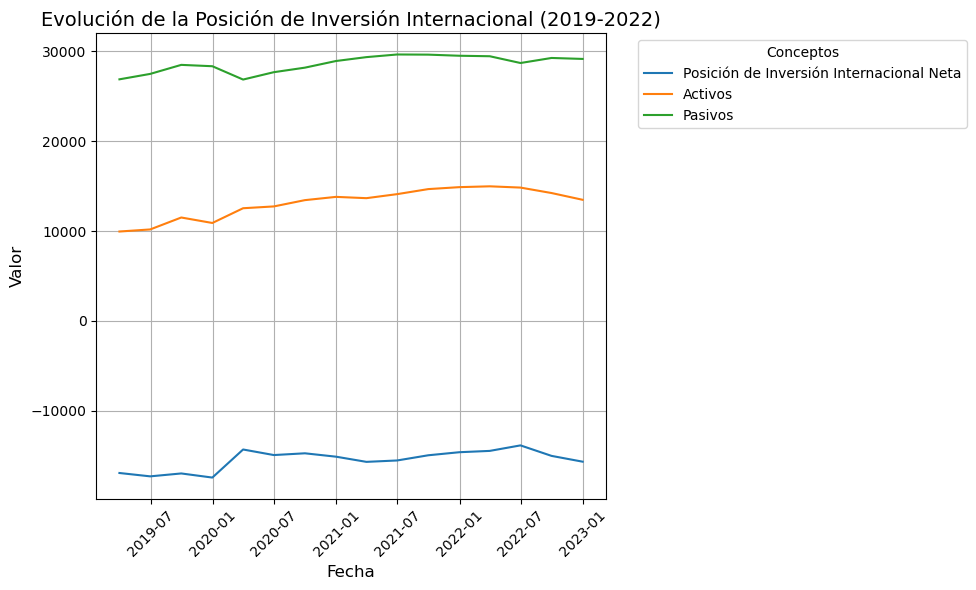

In [96]:
# Código para mostrar el diagrama lineal de la inversion extranjera
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for column in df_transformed.columns:
    plt.plot(df_transformed.index, df_transformed[column], label=column)

plt.title('Evolución de la Posición de Inversión Internacional (2019-2022)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend(title='Conceptos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


### 1.5 Precio histórico del Bitcoin

In [97]:
import re

btc_file_path = "Datos_bitcoin/btc history/Bitcoin history.csv"
df_btc = pd.read_csv(btc_file_path, encoding='ISO-8859-1', sep=",")

df_btc.rename(columns={'ï»¿"Date"': 'Date'}, inplace=True)
df_btc.set_index("Date", inplace=True)

df_btc.index = pd.to_datetime(df_btc.index, format="%b %d, %Y")
df_btc = df_btc.sort_index()
df_btc = df_btc.loc['2019-01-01':'2022-12-31']

df_btc = df_btc.map(lambda x: re.sub(r"[,%]", "", x) if isinstance(x, str) else x)
df_btc = df_btc.astype({"Price": float, "Open": float, "High": float, "Low": float, "Change %": float})
df_btc.head()



,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-01-01,3809.4,3709.5,3814.3,3664.4,469.11K,2.69
2019-01-02,3873.8,3809.7,3894.8,3768.1,554.47K,1.69
2019-01-03,3780.1,3874.1,3875.8,3753.0,450.32K,-2.42
2019-01-04,3802.7,3780.5,3823.9,3720.0,488.70K,0.60
2019-01-05,3785.4,3802.8,3846.7,3769.0,468.45K,-0.46


#### 1.5.1 Diagrama lineal

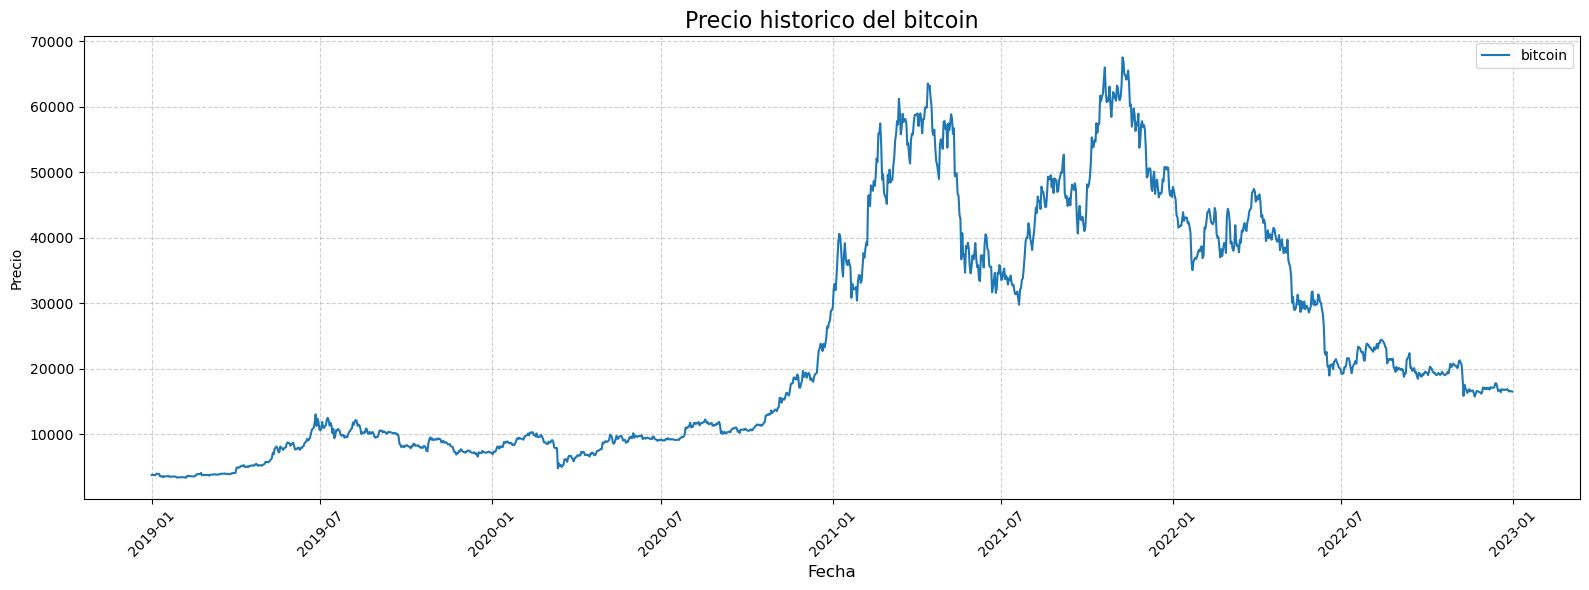

In [98]:
plt.figure(figsize=(16, 6))
plt.plot(df_btc.index, df_btc["Price"], label="bitcoin")

plt.title("Precio historico del bitcoin", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Precio")
plt.legend()

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 1.6 Reserva nacional

In [99]:
import pandas as pd
btc_file_path = "Datos_bitcoin/Reservas_BCR/Reservas_Internacionales_Netas_BCR.csv"
csv = pd.read_csv(btc_file_path, sep=",")
df_reserva = pd.DataFrame(csv)

df_reserva.drop(index=[0,1,6], axis=0, inplace=True)
df_reserva.columns = df_reserva.iloc[0]
df_reserva.drop(index=2, axis=0, inplace=True)
df_reserva = df_reserva.T
df_reserva.columns = df_reserva.iloc[0]
df_reserva.drop(index=['Concepto'],inplace=True)
df_reserva.to_csv('Datos_bitcoin/Reservas_BCR/reservasinternacionales.csv')
df_reserva2 = pd.read_csv('Datos_bitcoin/Reservas_BCR/reservasinternacionales.csv') #dataframe ya procesado

df_reserva2.index = df_reserva2["2"]
df_reserva2.drop("2", axis=1, inplace=True)
df_reserva2.index.name = "Fecha"
df_reserva2.index = pd.date_range("2019-01-01", "2022-12-31", freq="ME")
df_reserva2.head()

,Reservas Internacionales Netas,Activos de Reserva,PASIVOS EXTERNOS DE CORTO PLAZO
2019-01-31,3493.55,3662.09,168.54
2019-02-28,3615.30,4275.36,660.06
2019-03-31,3594.41,3868.56,274.16
2019-04-30,3712.89,4014.25,301.37
2019-05-31,3765.82,4571.11,805.29


#### 1.6.1 Diagrama lineal

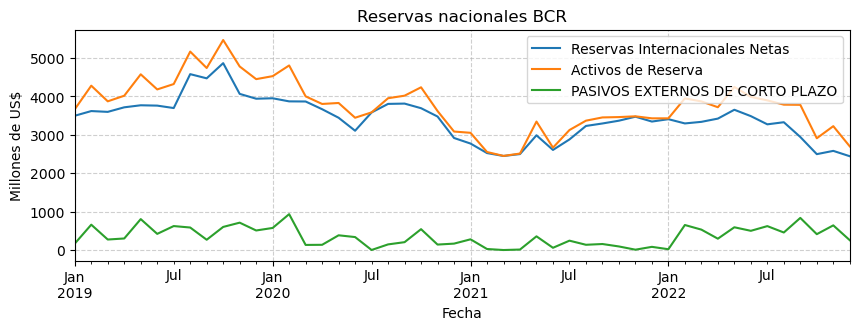

In [100]:
df_reserva2.plot(kind='line',figsize=(10, 3),fontsize=10)
plt.title('Reservas nacionales BCR')
plt.xlabel('Fecha'), plt.ylabel('Millones de US$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

A pesar de la adopción del bitcoin como activo de reserva, los datos reflejados por el BCR muetran que las la mayoría de indicadores de reservas nacionales han decaido desde la adopción del bitcoin, por medio de la documentación del BCR acerca de estos datos no se puede precisar si el bitcoin se toma en cuenta en estos indicadores, pero se puede suponer que el indicador relacionado con las reservas en bitcoin sería 'PASIVOS EXTERNOS DE CORTO PLAZO', este indicador tuvo un aumento del +52% entre el primer mes del 2019 y el ultimo mes de 2022.

## 2. Análisis de datos

### 2.1 Interpolando datos

Primero, interpolaremos los datos para rellenar fechas que falten, y así que todos los indices coincidan para correlacionar los datos

In [101]:
#Fechas que queremos para todos los datos
pd.date_range(df_btc.index.min(), df_btc.index.max(), freq="D")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')

Ahora cargaremos los datos que nos interesan de cada dataset en un nuevo dataframe

In [102]:
df_btc = df_btc[["Price"]] #Precio del bitcoin
df_rin = df_reserva2[["Reservas Internacionales Netas"]] # Reservas internacionales
df_niip = df_transformed[["Posición de Inversión Internacional Neta"]] # Posicion de inversión
df_pib = df_pib_filtered[["PIB en millones"]] # Bienes y servicios producidos
df_ipc = df_ipc[["Índice general"]] # Indice de precios al consumidor
df_dpe = df_DPE_concepto[["Total Deuda Externa Pública"]] # Deuda externa pública del estado

Ya teniendo los dataframes para cada dato de interés, procedemos a reindexar:

In [103]:
df_dpe = df_dpe.reindex(pd.date_range(df_btc.index.min(), df_btc.index.max(), freq="D"))
df_rin = df_rin.reindex(pd.date_range(df_btc.index.min(), df_btc.index.max(), freq="D"))
df_niip = df_niip.reindex(pd.date_range(df_btc.index.min(), df_btc.index.max(), freq="D"))
df_pib = df_pib.reindex(pd.date_range(df_btc.index.min(), df_btc.index.max(), freq="D"))
df_ipc = df_ipc.reindex(pd.date_range(df_btc.index.min(), df_btc.index.max(), freq="D"))


#Asignamos manualmente el valor del primer día para poder interpolar correctamente
df_dpe.loc["2019-01-01"]  = 9565.43 
df_rin.loc["2019-01-01"]  = 3353.55
df_niip.loc["2019-01-01"] = -16709.87
df_pib.loc["2019-01-01"]  = 26020.85
df_ipc.loc["2019-01-01"]  = 112.30

Ahora que tenemos todos los dataframes, con su fechas diarias, procedemos a interpolar los datos con el metodo **linear** para llenar los valores NaN

In [104]:
df_dpe.interpolate(method="linear", inplace=True)
df_rin.interpolate(method="linear", inplace=True)
df_niip.interpolate(method="linear", inplace=True)
df_pib.interpolate(method="linear", inplace=True)
df_ipc.interpolate(method="linear", inplace=True)

df_ipc.head()

,Índice general
2019-01-01,112.300
2019-01-02,112.298
2019-01-03,112.296
2019-01-04,112.294
2019-01-05,112.292


### 2.2 Juntando todos los DataFrame

In [105]:
df_variables = df_btc.join([df_dpe, df_rin, df_niip, df_pib, df_ipc])
# Cambiando el nombre de todas las columnas
df_variables.columns = ["precio_bitcoin", "dep", "rin", "niip", "pib", "igpc"]

df_variables.head()

,precio_bitcoin,dep,rin,niip,pib,igpc
Date,,,,,,
2019-01-01,3809.4,9565.430000,3353.550000,-16709.870000,26020.850000,112.300
2019-01-02,3873.8,9566.572885,3358.216667,-16712.550899,26023.213434,112.298
2019-01-03,3780.1,9567.715769,3362.883333,-16715.231798,26025.576868,112.296
2019-01-04,3802.7,9568.858654,3367.550000,-16717.912697,26027.940302,112.294
2019-01-05,3785.4,9570.001538,3372.216667,-16720.593596,26030.303736,112.292


Nombres cambiados:

- **dep**:  deuda pública externa
- **rin**:  reservas internacionales netas
- **niip**: posicion de inversión internacional neta
- **pib**:  producto interno bruto
- **igpc**: índice general de precios al consumidor

### 2.3 Entendiendo datos

- Tamaño: ``shape``
- Exploración: ``head`` and ``tail``
- Tipos de datos: ``dtypes``
- Estadísticos: ``describe``

In [106]:
df_variables.shape

(1461, 6)

In [107]:
df_variables.head()

,precio_bitcoin,dep,rin,niip,pib,igpc
Date,,,,,,
2019-01-01,3809.4,9565.430000,3353.550000,-16709.870000,26020.850000,112.300
2019-01-02,3873.8,9566.572885,3358.216667,-16712.550899,26023.213434,112.298
2019-01-03,3780.1,9567.715769,3362.883333,-16715.231798,26025.576868,112.296
2019-01-04,3802.7,9568.858654,3367.550000,-16717.912697,26027.940302,112.294
2019-01-05,3785.4,9570.001538,3372.216667,-16720.593596,26030.303736,112.292


In [108]:
df_variables.tail()

,precio_bitcoin,dep,rin,niip,pib,igpc
Date,,,,,,
2022-12-27,16706.1,11622.051973,2458.432258,-15660.138696,31956.637479,127.751935
2022-12-28,16546.2,11621.221479,2453.934194,-15667.151522,31964.708110,127.756452
2022-12-29,16636.4,11620.390986,2449.436129,-15674.164348,31972.778740,127.760968
2022-12-30,16607.2,11619.560493,2444.938065,-15681.177174,31980.849370,127.765484
2022-12-31,16537.4,11618.730000,2440.440000,-15688.190000,31988.920000,127.770000


In [109]:
df_variables.dtypes

precio_bitcoin    float64
dep               float64
rin               float64
niip              float64
pib               float64
igpc              float64
dtype: object

In [110]:
df_variables.describe()

,precio_bitcoin,dep,rin,niip,pib,igpc
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,23511.497947,10912.389257,3420.521783,-15522.094446,27463.268056,116.009367
std,17551.132555,825.974265,523.757986,1038.197124,1973.069230,5.062892
min,3397.700000,9565.430000,2440.440000,-17457.130000,24921.190000,111.560000
25%,9135.400000,9984.640656,3149.208387,-16760.807079,26110.012131,112.173871
50%,17125.700000,11152.880000,3423.854000,-15190.279348,26632.979423,112.892667
75%,38709.700000,11704.270795,3743.790000,-14761.278696,29043.140000,119.060000
max,67527.900000,11921.860000,4861.350000,-13873.190000,31988.920000,127.770000


### 2.4 Preparación y limpieza de datos

- Valores faltantes.
- Identificar filas duplicadas.
- Revisión de valores atípicos.
- Análisis de consistencia de los datos.
- Selección de variables.

In [111]:
df_variables.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2019-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precio_bitcoin  1461 non-null   float64
 1   dep             1461 non-null   float64
 2   rin             1461 non-null   float64
 3   niip            1461 non-null   float64
 4   pib             1461 non-null   float64
 5   igpc            1461 non-null   float64
dtypes: float64(6)
memory usage: 79.9 KB


In [112]:
df_variables[df_variables.duplicated()]

,precio_bitcoin,dep,rin,niip,pib,igpc
Date,,,,,,


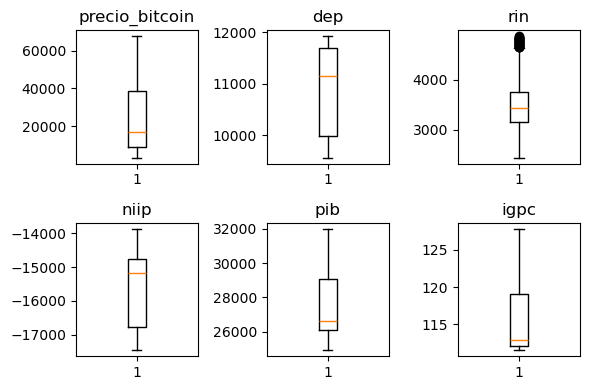

In [113]:
fig, axes = plt.subplots(2, 3, figsize=(6, 4))

for ax, col in zip(axes.ravel(), df_variables.columns):
    ax.boxplot(df_variables[col])  # Graficar un gráfico de caja para cada columna
    ax.set_title(col)    # Título con el nombre de la columna

plt.tight_layout()
plt.show()

### 2.5 Ánalisis gráfico de los datos

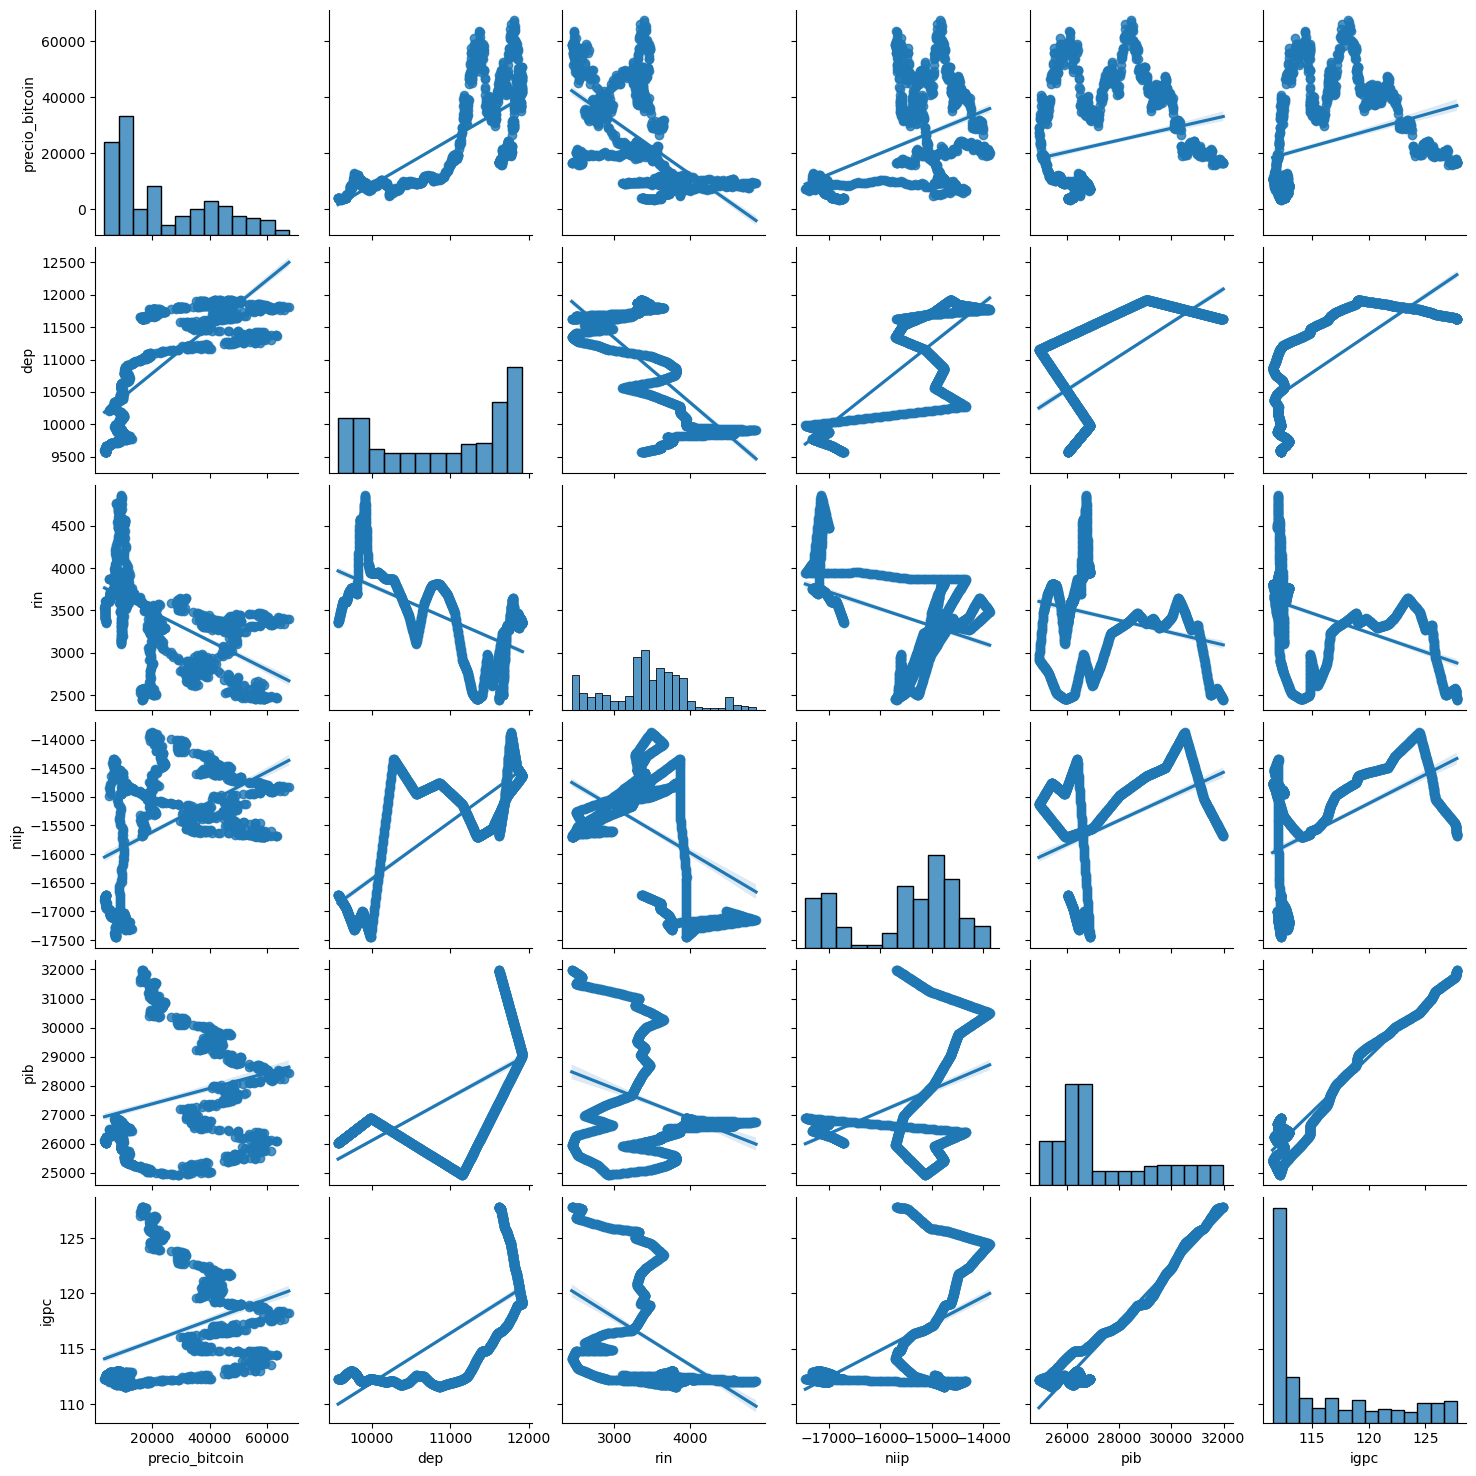

In [119]:
sns.pairplot(df_variables, kind="reg")

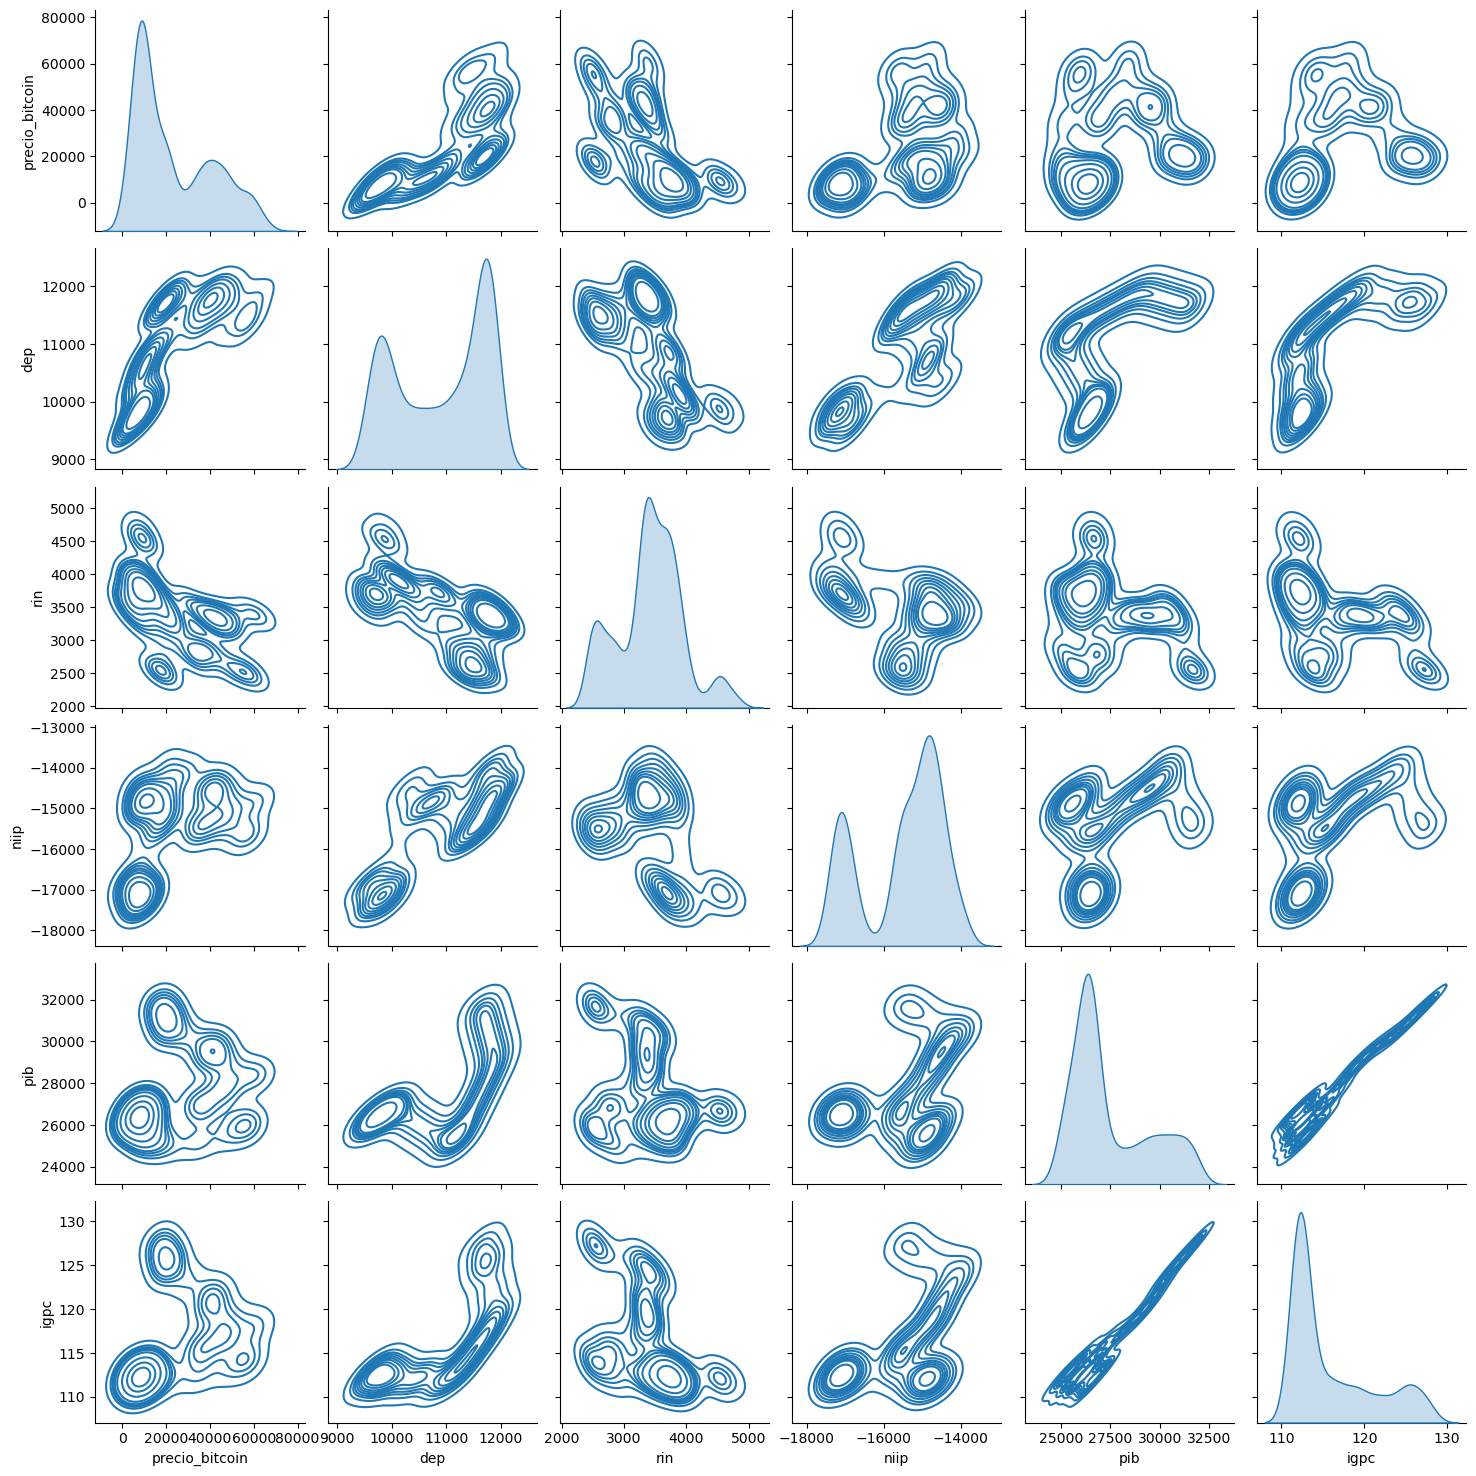

In [121]:
sns.pairplot(df_variables, kind="kde")

### 2.6 Análisis de normalidad

Maneras en las que evaluaremos la normalidad de nuestros datos:

- Evaluación gráfica
- Test estadístico

#### 2.6.1 Método gráfico: qqplot

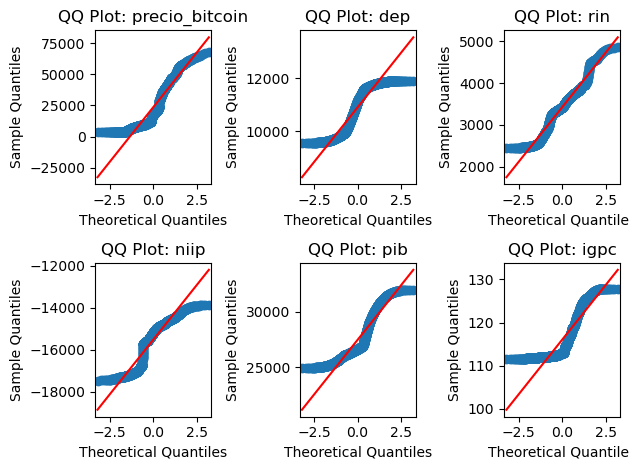

In [115]:
fig, axes = plt.subplots(2, 3)
axes = axes.ravel()
# Generar QQ plots para cada columna
for i, col in enumerate(df_variables.columns):
    sm.qqplot(df_variables[col], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot: {col}')

plt.tight_layout()
plt.show()

#### 2.6.2 Método estadístico

In [116]:
# Función para aplicar el test de Kolmogórov-Smirnov a una columna
def kolmogorov_test(column):
    statistic, p_value = kstest(column, 'norm')  # Compara contra la distribución normal
    return pd.Series({'KS_Statistic': statistic, 'p_value': p_value})

# Aplicar el test a cada columna
resultado = df_variables.apply(kolmogorov_test, axis=0).T
print(resultado, end="\n\n\n")

for col in resultado.index:
    p_value = resultado.loc[col, 'p_value']
    if p_value > 0.05: print(f"Columna '{col}': Los datos podrían seguir una distribución normal.")
    else: print(f"Columna '{col}': Los datos no siguen una distribución normal.")

                KS_Statistic  p_value
precio_bitcoin           1.0      0.0
dep                      1.0      0.0
rin                      1.0      0.0
niip                     1.0      0.0
pib                      1.0      0.0
igpc                     1.0      0.0


Columna 'precio_bitcoin': Los datos no siguen una distribución normal.
Columna 'dep': Los datos no siguen una distribución normal.
Columna 'rin': Los datos no siguen una distribución normal.
Columna 'niip': Los datos no siguen una distribución normal.
Columna 'pib': Los datos no siguen una distribución normal.
Columna 'igpc': Los datos no siguen una distribución normal.


### 2.7 Análisis de correlación

In [124]:
corr_variables = df_variables.corr()
corr_variables

,precio_bitcoin,dep,rin,niip,pib,igpc
precio_bitcoin,1.000000,0.766562,-0.572273,0.445448,0.237675,0.330401
dep,0.766562,1.000000,-0.636352,0.791143,0.620280,0.728096
rin,-0.572273,-0.636352,1.000000,-0.398701,-0.273205,-0.445430
niip,0.445448,0.791143,-0.398701,1.000000,0.399222,0.494630
pib,0.237675,0.620280,-0.273205,0.399222,1.000000,0.972173
igpc,0.330401,0.728096,-0.445430,0.494630,0.972173,1.000000


<Axes: >

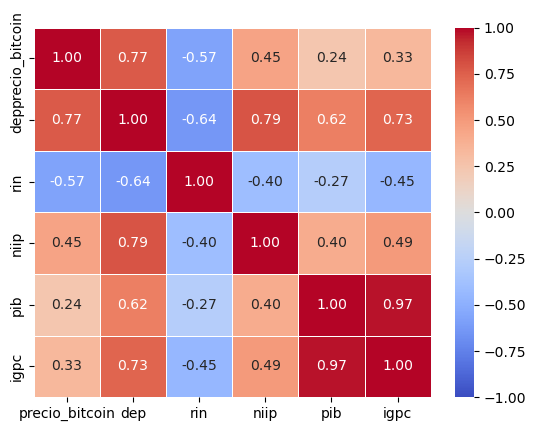

In [125]:
sns.heatmap(corr_variables, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmax=1, vmin=-1)

## 3. Conclusiones

- conclusión 1
- conclusión 2
- conclusión 3
- conclusión 4
